1st Algorithm on IRIS dataset SVM support vector machine. **SVM** aims to find the hyperplane that maximizes the margin between the closest data points of different classes.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Separate features and target variable
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.svm import SVC

# Create SVM classifier
svm_classifier = SVC(kernel='linear')  # Linear kernel

# Train the model
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions on test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



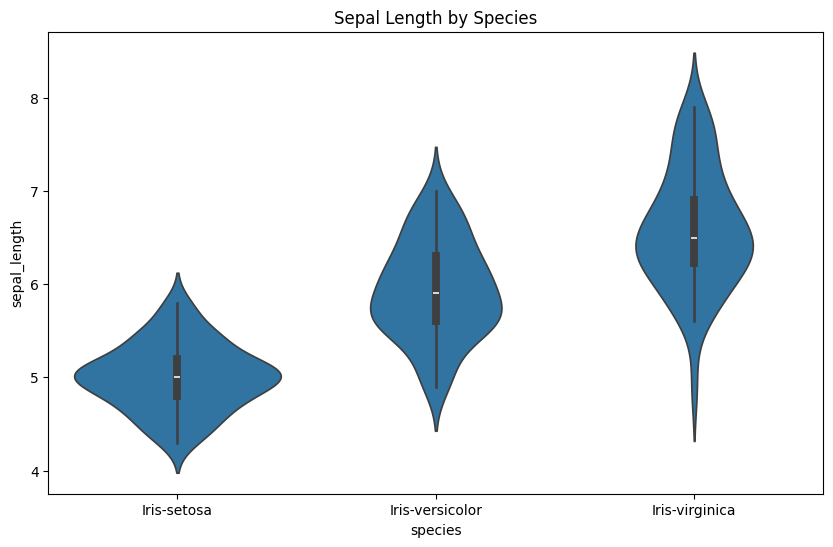

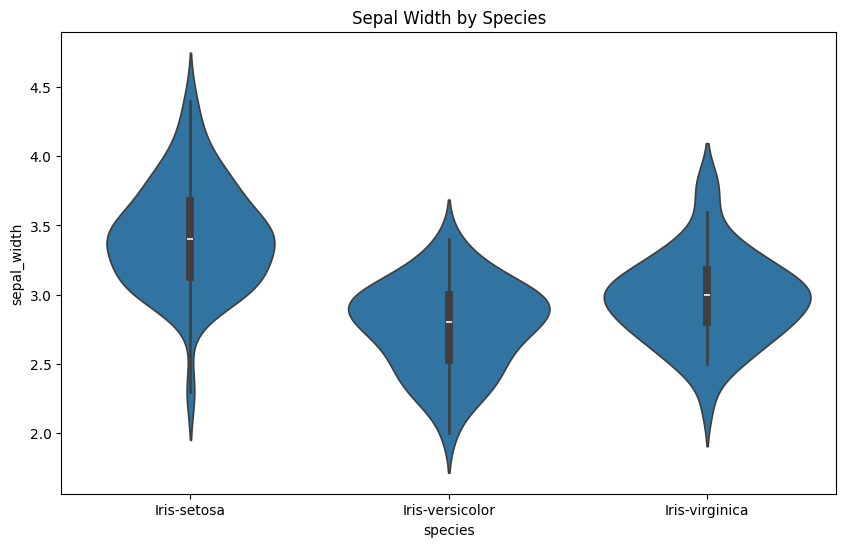

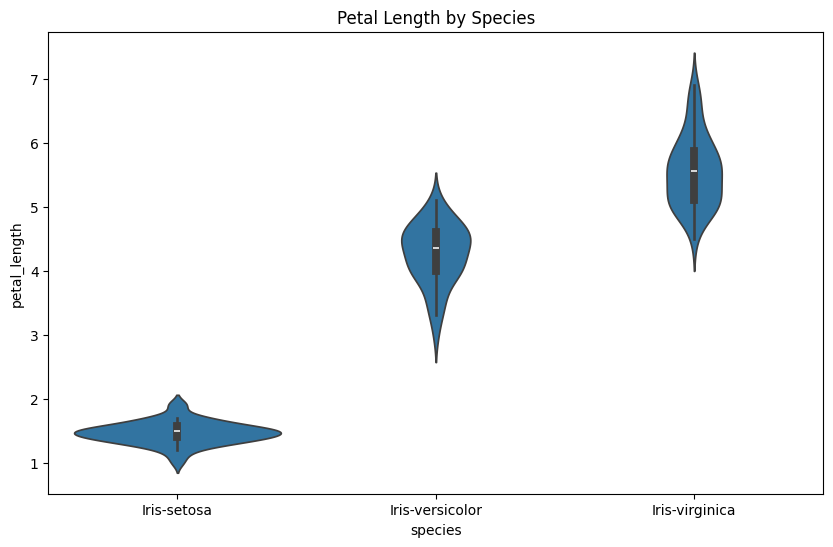

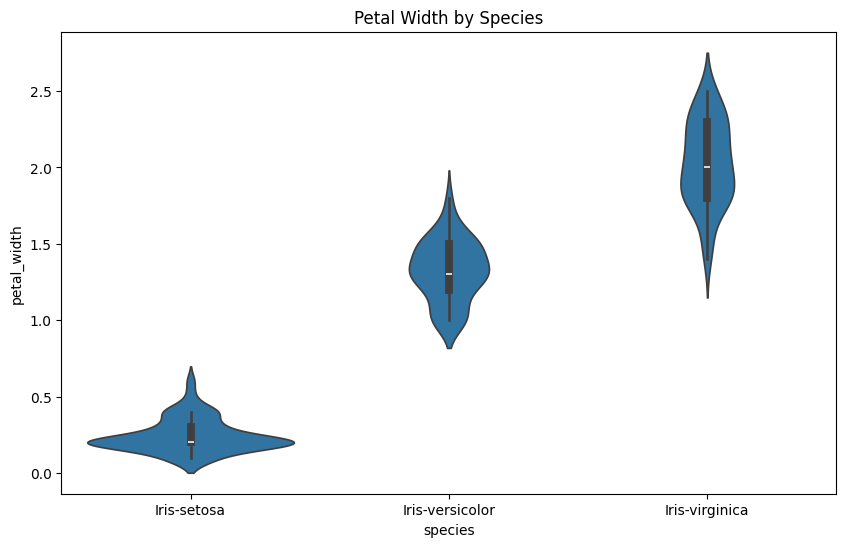

In [30]:
# Violin plot of each feature grouped by species
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="sepal_length", data=df)
plt.title('Sepal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="sepal_width", data=df)
plt.title('Sepal Width by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="petal_length", data=df)
plt.title('Petal Length by Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="petal_width", data=df)
plt.title('Petal Width by Species')
plt.show()

# 2nd algorithm decision tree unsupervised data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
drugs_df = pd.read_csv("/drugs.csv")

# Display the first few rows of the dataset
drugs_df.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [21]:
# Check for missing values
drugs_df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
# Encode categorical features
drugs_df = pd.get_dummies(drugs_df, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Separate features and target variable
X = drugs_df.drop(columns=['Drug'])
y = drugs_df['Drug']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



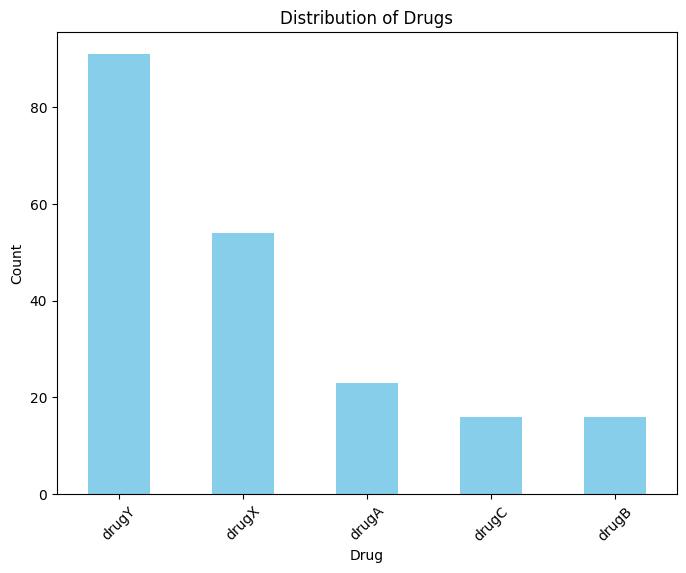

In [10]:
#Bar chart of Drug distribution
drug_counts = drugs_df['Drug'].value_counts()
plt.figure(figsize=(8, 6))
drug_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Drugs')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

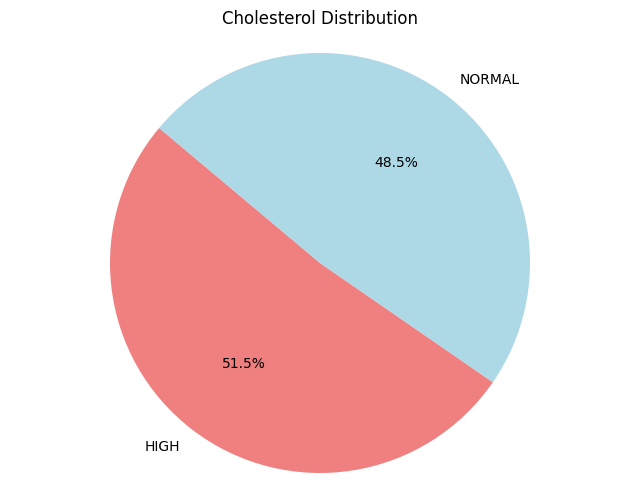

In [11]:
#Pie chart of Cholesterol distribution
cholesterol_counts = drugs_df['Cholesterol'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Cholesterol Distribution')
plt.axis('equal')
plt.show()

# 3rd algorithm random forest on unsupervised data

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
social_network_ads_df = pd.read_csv("/Social_Network_Ads.csv")

# Display the first few rows of the dataset
social_network_ads_df.head()




,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
# Check for missing values
social_network_ads_df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
# Separate features and target variable
X = social_network_ads_df.drop(columns=['Purchased'])
y = social_network_ads_df['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
# Initialize and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



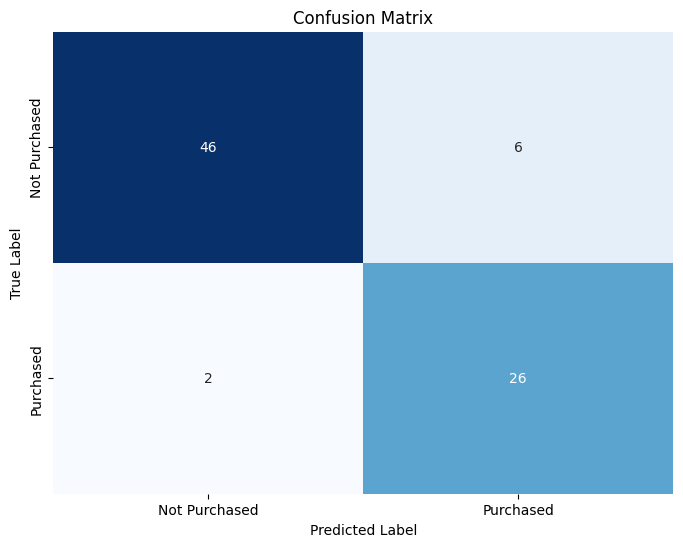

In [19]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
